In [2]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import ast
from cognitive_complexity.api import get_cognitive_complexity
import pprint
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.formula.api as sm
import datetime
import matplotlib.patches as mpatches

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 소스코드 complexity 계산

In [3]:
input_year_list = ['2021', '2022', '2023']

In [4]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/complexity_python_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [5]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [6]:
# 전체 데이터셋 
with open('../../data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [7]:
src_df.head()

,idx,id,src
0,995,77296103,from copy import deepcopy\nfrom typing import ...
1,996,77296116,"preprocessing = ColumnTransformer([(""One Hot E..."
2,997,77296116,"SVC_model = Pipeline([(""preprocessing"", prepro..."
3,998,77296116,"svc_params = {\n'kernel': [""linear"", ""poly"", ""..."
4,999,77296116,# Access the cross-validation results from the...


In [8]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/calc_com_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [9]:
calc_com_df.reset_index(drop=True, inplace=True)

In [10]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [11]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [12]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [13]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [14]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [15]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [16]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [17]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939219 entries, 0 to 939218
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   idx     939219 non-null  int64 
 1   id      939219 non-null  int64 
 2   src     939219 non-null  object
dtypes: int64(2), object(1)
memory usage: 21.5+ MB


In [18]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [19]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [20]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


In [21]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [22]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [23]:
calc_ed_com_df['yyyymm'] = calc_ed_com_df['cdate'].str[:7]

In [24]:
calc_ed_com_mean_df = calc_ed_com_df.groupby(['cdate']).mean(numeric_only=True).reset_index()
# ['Cognitive Complexity']

In [25]:
calc_ed_com_mean_df['cdate'] = pd.to_datetime(calc_ed_com_mean_df['cdate'])

In [26]:
calc_ed_com_mean_df.loc[:,  'rel_days'] = (calc_ed_com_mean_df.loc[:,  'cdate'] - datetime.datetime(2022,11,30)).dt.days

In [27]:
calc_ed_com_mean_df.head()

,cdate,id,idx,Cognitive Complexity,rel_days
0,2021-01-01,6.553101e+07,394448.410480,1.689956,-698
1,2021-01-02,6.554027e+07,393165.784768,1.582781,-697
2,2021-01-03,6.555093e+07,391343.544025,1.729560,-696
3,2021-01-04,6.556447e+07,389050.580563,1.485934,-695
4,2021-01-05,6.558022e+07,387018.978622,1.570071,-694


In [28]:
chow_df = calc_ed_com_mean_df[['rel_days', 'Cognitive Complexity', 'cdate']]

In [29]:
chow_df = chow_df[(chow_df['rel_days']>=-365*2)&(chow_df['rel_days']<365)]

In [30]:
x = chow_df['rel_days'].values

In [31]:
np.argmax(np.where(x <= 0)) 

698

698


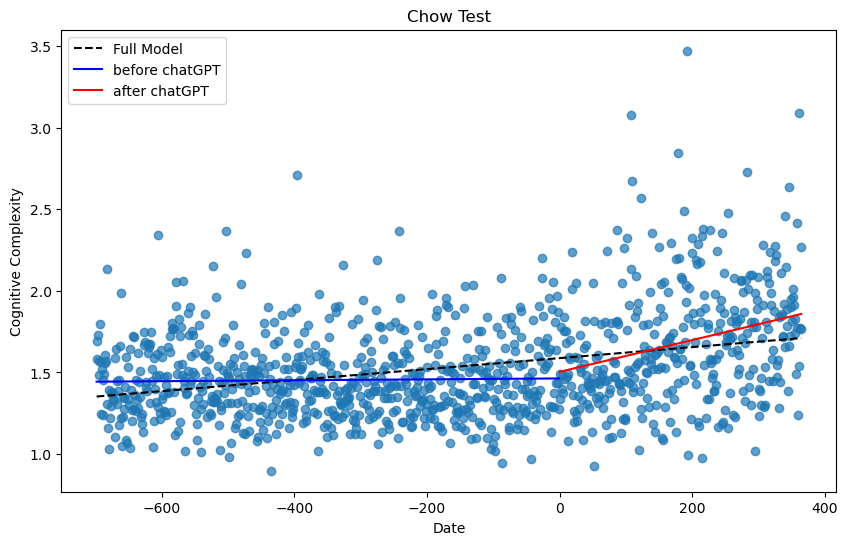

F-Statistic: 29.545783966461492
p-value: 3.262945469373335e-13


In [58]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f
import matplotlib.pyplot as plt

def chow_test_with_plot(dates, split_point):
    # 날짜 데이터를 숫자로 변환 (일 단위)
    x = dates['rel_days'].values
    y = dates['Cognitive Complexity'].values
    split_idx = np.argmax(np.where(x <= 0))
    print(split_idx)

    # 데이터를 split_date 기준으로 분리 .values
    x1, y1 = x[:split_idx], y[:split_idx]
    x2, y2 = x[split_idx:], y[split_idx:]

    # 회귀 모델 생성
    x_const = sm.add_constant(x)
    x1_const = sm.add_constant(x1)
    x2_const = sm.add_constant(x2)
    # print(x1, x2 )

    model_full = sm.OLS(y, x_const).fit()
    model1 = sm.OLS(y1, x1_const).fit()
    model2 = sm.OLS(y2, x2_const).fit()

    # # 잔차 제곱합 계산
    RSS_full = np.sum(model_full.resid ** 2)
    RSS_1 = np.sum(model1.resid ** 2)
    RSS_2 = np.sum(model2.resid ** 2)

    # # 자유도 계산
    k = 2  # 독립 변수 개수 (상수항 포함)
    n1, n2 = len(y1), len(y2)
    F_stat = ((RSS_full - (RSS_1 + RSS_2)) / k) / ((RSS_1 + RSS_2) / (n1 + n2 - 2 * k))

    # p-value 계산
    p_value = 1 - f.cdf(F_stat, k, n1 + n2 - 2 * k)

    # # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y,  alpha=0.7)
    plt.plot(x, model_full.predict(x_const), label="Full Model", linestyle="--", color="black")
    plt.plot(x1, model1.predict(x1_const), label="before chatGPT", color="blue", linewidth='1.5')
    plt.plot(x2, model2.predict(x2_const), label="after chatGPT", color="red", linewidth='1.5')
    # plt.text(5, 3.8,s=f'F-Statistic={F_stat:.2f}')
    plt.legend()
    plt.title(f"Chow Test")
    plt.xlabel("Date")
    plt.ylabel("Cognitive Complexity")
    # plt.grid()
    plt.show()
    # : F-Statistic={F_stat:.2f}, p-value={p_value:.4f}
    return F_stat, p_value


# Chow Test 실행 및 시각화
split_point = 0
F_stat, p_value = chow_test_with_plot(chow_df, split_point)

print("F-Statistic:", F_stat)
print("p-value:", p_value)


In [ ]:
print(chow_test(chow_df['rel_days'] ,chow_df['Cognitive Complexity'], 365, 365+1, .05))

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 26.455811124439922, P_value: 6.144085240578079e-12
(26.455811124439922, 6.144085240578079e-12)


365


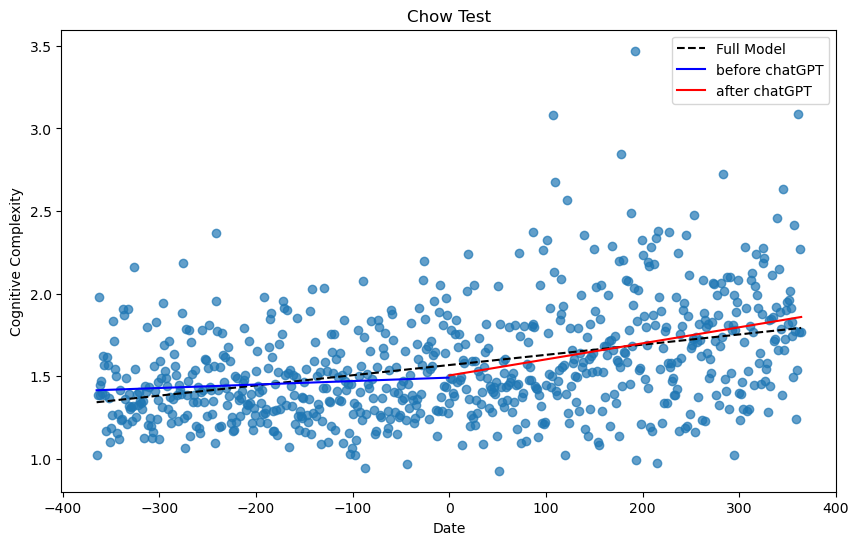

F-Statistic: 6.31655418632016
p-value: 0.001906995303224135


In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import f
import matplotlib.pyplot as plt

def chow_test_with_plot(dates, split_point):
    # 날짜 데이터를 숫자로 변환 (일 단위)
    x = dates['rel_days'].values
    y = dates['Cognitive Complexity'].values
    split_idx = np.argmax(np.where(x <= 0))
    print(split_idx)

    # 데이터를 split_date 기준으로 분리 .values
    x1, y1 = x[:split_idx], y[:split_idx]
    x2, y2 = x[split_idx:], y[split_idx:]

    # 회귀 모델 생성
    x_const = sm.add_constant(x)
    x1_const = sm.add_constant(x1)
    x2_const = sm.add_constant(x2)
    # print(x1, x2 )

    model_full = sm.OLS(y, x_const).fit()
    model1 = sm.OLS(y1, x1_const).fit()
    model2 = sm.OLS(y2, x2_const).fit()

    # # 잔차 제곱합 계산
    RSS_full = np.sum(model_full.resid ** 2)
    RSS_1 = np.sum(model1.resid ** 2)
    RSS_2 = np.sum(model2.resid ** 2)

    # # 자유도 계산
    k = 2  # 독립 변수 개수 (상수항 포함)
    n1, n2 = len(y1), len(y2)
    F_stat = ((RSS_full - (RSS_1 + RSS_2)) / k) / ((RSS_1 + RSS_2) / (n1 + n2 - 2 * k))

    # p-value 계산
    p_value = 1 - f.cdf(F_stat, k, n1 + n2 - 2 * k)

    # # 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.7)
    plt.plot(x, model_full.predict(x_const), label="Full Model", linestyle="--", color="black", linewidth='1.5')
    plt.plot(x1, model1.predict(x1_const), label="before chatGPT", color="blue", linewidth='1.5')
    plt.plot(x2, model2.predict(x2_const), label="after chatGPT", color="red", linewidth='1.5')
    # plt.axvline(pd.to_datetime(split_date), color="green", linestyle="--", label="Split Point")
    plt.legend()
    plt.title(f"Chow Test")
    plt.xlabel("Date")
    plt.ylabel("Cognitive Complexity")
    # plt.grid()
    plt.title(f"Chow Test")
    # plt.text(0.2, 1,s=f'F-Statistic={F_stat:.2f}')
    plt.show()
    # : F-Statistic={F_stat:.2f}, p-value={p_value:.4f}
    
    return F_stat, p_value


# Chow Test 실행 및 시각화
split_point = 0
F_stat, p_value = chow_test_with_plot(chow_df[chow_df['rel_days']>=-365], split_point)

print("F-Statistic:", F_stat)
print("p-value:", p_value)
# 111111

In [ ]:
chow_df[chow_df['rel_days']>=-365]

,rel_days,Cognitive Complexity,cdate
333,-365,1.020101,2021-11-30
334,-364,1.382775,2021-12-01
335,-363,1.979167,2021-12-02
336,-362,1.444730,2021-12-03
337,-361,1.382979,2021-12-04
...,...,...,...
1058,360,1.537037,2023-11-25
1059,361,3.086331,2023-11-26
1060,362,1.769231,2023-11-27
1061,363,2.269406,2023-11-28
